# Example code for OSL Learning
We will use the

In [14]:
import torch

import matplotlib.pyplot as plt

from datasets.openml_datasets import OpenML_Dataset
from datasets.torch_datasets import Torch_Dataset
from utils.weakener import Weakener
from models.model import MLP
from models.general_model import MLP
from utils.losses import PartialLoss,LBLoss,EMLoss,OSLCELoss,OSLBrierLoss,CELoss
from utils.trainig_testing import train_model,evaluate_model,train_and_evaluate

The steps you might want to take for running the full 'weakening - learning - evaluating' experience
<ol>
<li> Loading the clean dataset: <code>Data = OpemML_Dataset('name')</code></li>
<li> Setting the Weakener class: <code>Weak = Weakener(Data.num_classes)</code></li>
<ol>
<li> Generate the mixing matrix: <code>WL.generate_M(model_class='pll')</code></li>
<li> Generate the weak labels <em>(z=index,w=one_hot)</em>: <code>z, w = WL.generate_weak(train_y)</code></li>
<ul style="list-style: none;">
 <li>Generating virtual label matrix or virtual labels is not necessary when training an OSL Learning algorithm as it only uses the weak labels</li>
</ul>
</ol>
<li>Generate the dataloaders (trainloader/testloader) for the dataset enhaced with the weak labels</li>
<ol>
<li> Include weak labels into the dataset: <code>Data.include_weak(Weak.w)</code></li>
<li> Generate the dataloaders: <code>trainloader, testloader = Data.get_dataloader()</code></li>
</ol>
<li> We create the mlp: <code>mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.5)</code></li>
</ol>

Fasten your seatbelt!

In [2]:
#Data = OpenML_Dataset('iris')
Data = Torch_Dataset('mnist')
train_x, train_y, test_x, test_y = Data.get_data()
# WL stores processes relative to the Weakening process
Weak = Weakener(Data.num_classes)
Weak.generate_M(model_class='pll')

In [3]:
z, w = Weak.generate_weak(train_y)

In [4]:
Data.include_weak(Weak.w)

In [5]:
trainloader, testloader = Data.get_dataloader()



In [10]:
mlp = MLP(Data.num_features,[Data.num_features,Data.num_features,Data.num_features],Data.num_classes,dropout_p=0.3)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = OSLCELoss()

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)


Epoch 1/10: Train Loss: 1.9672, Train Acc: 0.7198, Test Acc: 0.9016
Epoch 2/10: Train Loss: 0.2943, Train Acc: 0.8653, Test Acc: 0.9181
Epoch 3/10: Train Loss: 0.2580, Train Acc: 0.8816, Test Acc: 0.9158
Epoch 4/10: Train Loss: 0.2878, Train Acc: 0.8741, Test Acc: 0.9185
Epoch 5/10: Train Loss: 0.2879, Train Acc: 0.8805, Test Acc: 0.9347
Epoch 6/10: Train Loss: 0.2919, Train Acc: 0.8857, Test Acc: 0.9300
Epoch 7/10: Train Loss: 0.2979, Train Acc: 0.8812, Test Acc: 0.9321
Epoch 8/10: Train Loss: 0.2795, Train Acc: 0.8912, Test Acc: 0.9366
Epoch 9/10: Train Loss: 0.2595, Train Acc: 0.8971, Test Acc: 0.9402
Epoch 10/10: Train Loss: 0.2762, Train Acc: 0.8929, Test Acc: 0.9472


In [11]:
import pickle
model_data = {
    'model': mlp,
    'results': results
}
with open('results/trained_mlp.pkl', 'wb') as file:
    pickle.dump(model_data, file)

In [27]:
with open('results/trained_mlp.pkl', 'rb') as file:
    model_data = pickle.load(file)


mlp = model_data['model']
results = model_data['results']

In [28]:
#Data.include_weak(Weak.w)
#Weak.virtual_matrix(convex=True)
#Weak.virtual_labels(train_y)

#Data.include_weak(Weak.v)
Data.include_weak(Weak.w)
trainloader, testloader = Data.get_dataloader()

#trainloader, testloader = Data.get_dataloader()

In [29]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = OSLCELoss()

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)


Epoch 1/10: Train Loss: 0.3579, Train Acc: 0.8841, Test Acc: 0.8770
Epoch 2/10: Train Loss: 0.3634, Train Acc: 0.8701, Test Acc: 0.8900
Epoch 3/10: Train Loss: 0.3307, Train Acc: 0.8726, Test Acc: 0.9284
Epoch 4/10: Train Loss: 0.3086, Train Acc: 0.8744, Test Acc: 0.9352
Epoch 5/10: Train Loss: 0.2942, Train Acc: 0.8802, Test Acc: 0.9153
Epoch 6/10: Train Loss: 0.2815, Train Acc: 0.8814, Test Acc: 0.9396
Epoch 7/10: Train Loss: 0.2830, Train Acc: 0.8841, Test Acc: 0.9034
Epoch 8/10: Train Loss: 0.3033, Train Acc: 0.8758, Test Acc: 0.9221
Epoch 9/10: Train Loss: 0.3038, Train Acc: 0.8719, Test Acc: 0.9157
Epoch 10/10: Train Loss: 0.2980, Train Acc: 0.8786, Test Acc: 0.9018


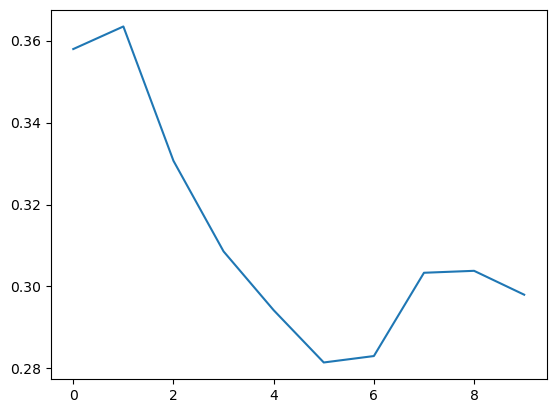

In [30]:
plt.plot(results['train_loss'])

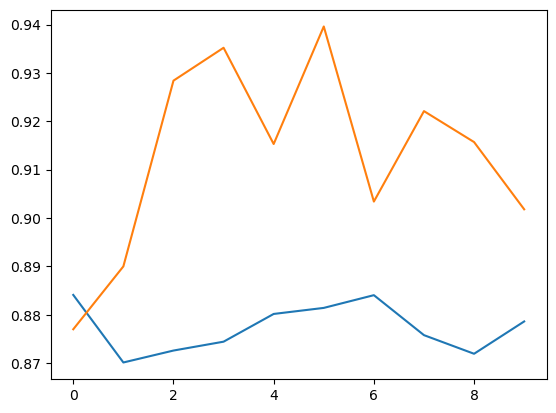

In [31]:
plt.plot(results['train_acc'])
plt.plot(results['test_acc'])
